<a href="https://colab.research.google.com/github/Thiago-Reis-Porto/treinamento-h2ia/blob/main/K_means_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><color><b>This notebook is an implementations of k-means in the iris dataset<h1>

In [138]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
style.use("fivethirtyeight")
import numpy as np

K-means class

In [140]:
#TODO remove centroids when no points are assigned to it
class K_Means:
  
    def __init__(self, k, tol=0.001, max_iter=100):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}
        
        #initialize centroids with first date / could use random here
        for i in range(self.k): self.centroids[i] = data[i]
            
        #interate
        for i in range(self.max_iter):
            
            #new classification
            self.classifications = {}
            self.inertia = 0
            
            #initialize classification of each centroid
            for i in range(self.k): self.classifications[i] = []

            for featureset in data:
                # for every data get the distances from each centroid  with the linalg norm function
                # data point - centroid point = vector, then get the vector size
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                # Put the data in the classification accordingly with the min distance
                min_dist = min(distances, default="EMPTY")
                #if not_dist
                self.classifications[distances.index(min_dist)].append(featureset)
                self.inertia += min_dist            
            
            # Save old centroids    
            prev_centroids = dict(self.centroids)

            # Get new centroids base on the average of the groups
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            # If the centroids diference is equal or smaller than the tolerance stop
            optimized = True
            for c in self.centroids:
                if np.sum((self.centroids[c] - prev_centroids[c])/prev_centroids[c]*100.0) > self.tol:
                    optimized = False; break

            if optimized: break
    
    # Predict new data based on trained centroids
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

Load the iris data

In [28]:
iris = load_iris()

**Prepare data:**

In [130]:
# Normalize values
normalized = StandardScaler().fit_transform(iris.data)

In [131]:
# iris data has 4 atributes
n_atributes = 4
pca = PCA(n_components=n_atributes)
pcs = pca.fit_transform(normalized)

See with "PCs" are good

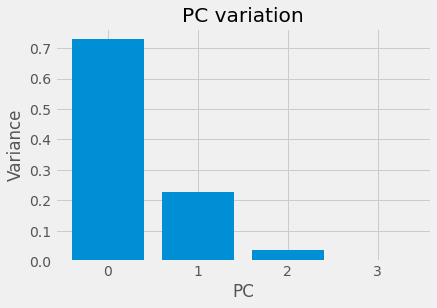

In [86]:
  plt.bar(x=range(n_atributes) , height=pca.explained_variance_ratio_)
  plt.ylabel("Variance")
  plt.xlabel("PC")
  plt.title("PC variation")
  plt.show()

Looks like PC0 and PC1 says more about the data, lets work with them

In [132]:
data = np.array(list(zip(pcs[:,0],pcs[:,1])))

Finding a good k value with the elbow method

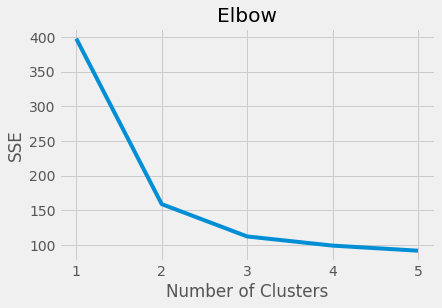

In [133]:
sse = []
model = []
for i in range(1,6):
  model.append(K_Means(i))
  model[i-1].fit(data)
  sse.append( model[i-1].inertia)
plt.title("Elbow")
plt.plot(range(1,6),sse)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Looks like 3 is a good value for k

In [134]:
model = model[2]

In [135]:
model.centroids

{0: array([1.7331456 , 0.66828389]),
 1: array([ 0.6246295 , -0.78305114]),
 2: array([-2.22475316,  0.28892745])}

<h1><b><center>Result:

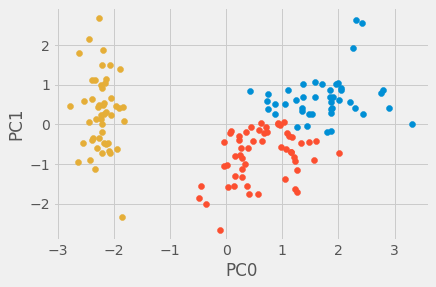

In [136]:
for i in (dict.values(model.classifications)):
    x = []; y =[]
    for j in i:
      x.append(j[0]); y.append(j[1])
    plt.scatter(x,y)

plt.ylabel("PC1")
plt.xlabel("PC0")
plt.show()